## 108 Hyperedge

In [3]:
import os
import json
import csv

# Define the input folder path and output file
input_folder = r"C:\Users\Neeharika Telu\Dropbox\Mini_clean\hypergraph_everyday_Null_clean"
output_file = "100_hyperedges_data.csv"

# Open the output CSV file for writing
with open(output_file, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Date", "Token", "Nodes"])
    
    # Iterate through each file in the folder
    for filename in sorted(os.listdir(input_folder)):
        if filename.endswith(".json"):  # Ensure it's a JSON file
            file_path = os.path.join(input_folder, filename)
            
            # Extract date from filename (assuming format: hypergraph_YYYY-MM-DD.json)
            date = filename.replace("hypergraph_", "").replace(".json", "")
            
            try:
                # Read JSON file
                with open(file_path, 'r') as file:
                    data = json.load(file)
                
                # Extract 5-hyperedges (tokens with exactly 5 nodes)
                for token, nodes in data.items():
                    if isinstance(nodes, list) and len(nodes) == 100:
                        writer.writerow([date, token, json.dumps(nodes)])
            except Exception as e:
                print(f"Error processing file {filename}: {e}")

print(f"Extraction completed. Data saved in {output_file}")


Extraction completed. Data saved in 100_hyperedges_data.csv


In [1]:
import csv
from collections import defaultdict

# Define file paths
input_file = r"C:\Users\Neeharika Telu\Dropbox\Mini_clean\100_hyperedges_data.csv"
output_file = r"D:\SEM_8\Major Project\100_hyperedges_occurrences.csv"

# Dictionary to store occurrences
hyperedge_dict = defaultdict(list)

# Read input file
with open(input_file, "r") as infile:
    reader = csv.reader(infile)
    header = next(reader)  # Read header
    
    for row in reader:
        date = row[0]
        token = row[1]
        nodes = row[2]
        
        # Store date occurrences per (token, nodes)
        hyperedge_dict[(token, nodes)].append(date)

# Write output file
with open(output_file, "w", newline="") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["Token", "Nodes", "Dates"])
    
    for (token, nodes), dates in hyperedge_dict.items():
        writer.writerow([token, nodes, ", ".join(dates)])

print("Processing complete. Check 4_hyperedges_occurrences.csv in SEM_8 Major Project folder.")


Processing complete. Check 4_hyperedges_occurrences.csv in SEM_8 Major Project folder.


In [3]:
import csv
from collections import defaultdict

# Input file (your CSV data)
input_file = r"C:\Users\Neeharika Telu\Dropbox\Mini_clean\100_hyperedges_data.csv"

# Dictionary to store token-wise node sets and their occurrence dates
token_nodes_date_map = defaultdict(lambda: defaultdict(list))

# Read the CSV file and collect tokens, node sets, and corresponding dates
with open(input_file, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        token = row['Token']
        date = row['Date']
        nodes = tuple(sorted(eval(row['Nodes'])))  # Convert the nodes string to a sorted tuple to ensure exact matching
        
        # Store the date where this token had this exact set of nodes
        token_nodes_date_map[token][nodes].append(date)

# Find tokens and node sets that have been repeated on different days
repeated_tokens_data = []
for token, nodes_dates in token_nodes_date_map.items():
    for nodes, dates in nodes_dates.items():
        if len(dates) >= 1:  # If the same set of nodes appeared on multiple dates
            repeated_tokens_data.append({
                'Token': token,
                'Nodes': nodes,
                'Dates': dates
            })

# Output the repeated tokens and their occurrence dates
output_file = r"D:\SEM_8\Major Project\100_hyperedges_repeated_tokens.csv"

# Write the result to a CSV file
with open(output_file, 'w', newline='') as csvfile:
    fieldnames = ['Token', 'Nodes', 'Dates']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header
    writer.writeheader()
    
    # Write the repeated tokens, nodes, and their occurrence dates
    for entry in repeated_tokens_data:
        writer.writerow({
            'Token': entry['Token'],
            'Nodes': entry['Nodes'],
            'Dates': ", ".join(entry['Dates'])  # Convert the list of dates to a comma-separated string
        })

print("Repeated tokens and nodes with dates have been successfully saved to CSV.")


Repeated tokens and nodes with dates have been successfully saved to CSV.


In [4]:

import csv

# Define file paths
non_smart_file = r"D:\SEM_8\Major Project\df_nonsmart_combined_unique.csv"
smart_file = r"D:\SEM_8\Major Project\df_smart_combined_unique.csv"
input_file = r"D:\SEM_8\Major Project\100_hyperedges_repeated_tokens.csv"
output_file = r"D:\SEM_8\Major Project\smart_filtered_100_output.csv"

# Load non-smart contract addresses
with open(non_smart_file, "r") as f:
    next(f)  # Skip header
    non_smart_contracts = set(int(line.strip()) for line in f)

# Load smart contract addresses
with open(smart_file, "r") as f:
    next(f)  # Skip header
    smart_contracts = set(int(line.strip()) for line in f)

# Read the input CSV file and process
with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    # Write header
    header = next(reader)
    writer.writerow(header[:2] + ["Smart_Contract_Flags"] + [header[2]])
    
    for row in reader:
        token = row[0]
        nodes = eval(row[1])  # Convert string tuple to actual tuple
        dates = row[2]
        
        # Check if nodes are smart contracts
        flags = tuple(1 if int(node) in smart_contracts else 0 for node in nodes)
        
        # Write updated row
        writer.writerow([token, row[1], str(flags), dates])

print("Processing complete. Check output.csv")


Processing complete. Check output.csv


## Temporal Distance 

In [5]:
import pandas as pd

# Input file path
input_file = r"D:\SEM_8\Major Project\smart_filtered_100_output.csv"

# Read CSV file
df = pd.read_csv(input_file)

# Ensure Dates column is properly processed by stripping spaces and converting to datetime
df['Dates'] = df['Dates'].apply(lambda x: sorted(pd.to_datetime([date.strip() for date in x.split(',')])))

# Function to compute temporal distances
def calculate_temporal_distances(dates):
    return [abs((dates[i] - dates[i-1]).days) for i in range(1, len(dates))]

# Compute temporal distances
df['Temporal_Distance'] = df['Dates'].apply(lambda x: calculate_temporal_distances(x))

# Convert dates to "YYYY-MM-DD" format (remove timestamps)
df['Dates'] = df['Dates'].apply(lambda x: str([date.strftime("%Y-%m-%d") for date in x]))

# Convert the list of temporal distances to a string format
df['Temporal_Distance'] = df['Temporal_Distance'].apply(lambda x: str(x))

# Save to output CSV file
output_file = r"D:\SEM_8\Major Project\temporal_distances_100_output.csv"
df.to_csv(output_file, index=False)

print(f"Temporal distances saved to: {output_file}")


Temporal distances saved to: D:\SEM_8\Major Project\temporal_distances_100_output.csv


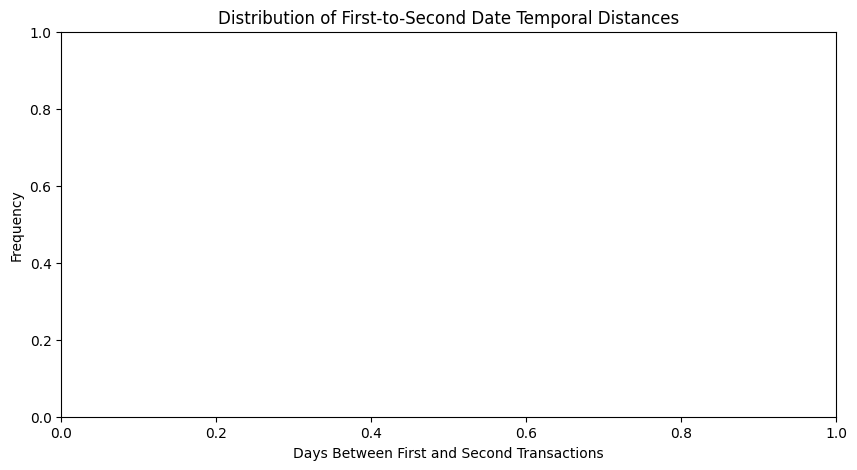

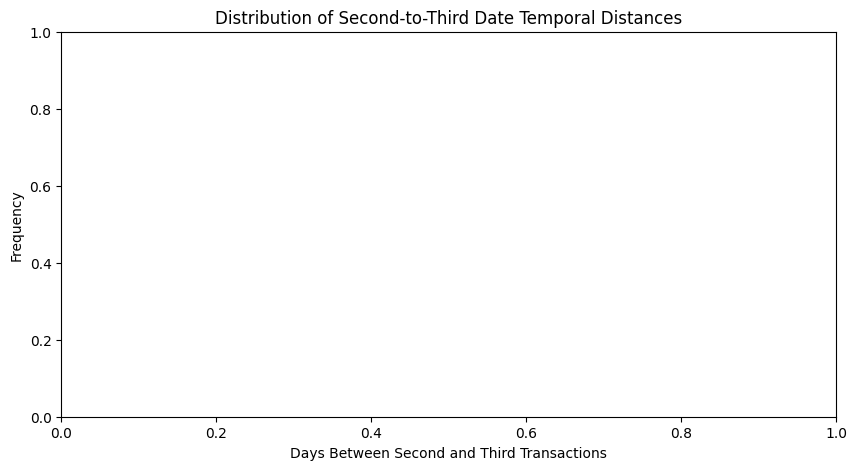

In [7]:
import pandas as pd
import ast  # To convert string list into actual list
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"D:\SEM_8\Major Project\temporal_distances_100_output.csv"
df = pd.read_csv(file_path)

# Convert 'Dates' and 'Temporal_Distance' columns from string to list
df["Dates"] = df["Dates"].apply(ast.literal_eval)
df["Temporal_Distance"] = df["Temporal_Distance"].apply(ast.literal_eval)

# Lists to store distances
first_to_second = []
second_to_third = []

# Extract the first-to-second and second-to-third temporal distances
for distances in df["Temporal_Distance"]:
    if len(distances) >= 1:  
        first_to_second.append(distances[0])  # First to second distance
    if len(distances) >= 2:  
        second_to_third.append(distances[1])  # Second to third distance

# 📌 Plot 1: First-to-Second Date Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(first_to_second, bins=30, kde=True, color="blue", alpha=0.7)
plt.xlabel("Days Between First and Second Transactions")
plt.ylabel("Frequency")
plt.title("Distribution of First-to-Second Date Temporal Distances")
# plt.grid(True, linestyle="--", alpha=0.5)
plt.grid(False)
plt.show()

# 📌 Plot 2: Second-to-Third Date Distance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(second_to_third, bins=30, kde=True, color="red", alpha=0.7)
plt.xlabel("Days Between Second and Third Transactions")
plt.ylabel("Frequency")
plt.title("Distribution of Second-to-Third Date Temporal Distances")
# plt.grid(True, linestyle="--", alpha=0.5)
plt.grid(False)
plt.show()
